In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/HAR Dataset/HAR Mine")

In [3]:
!ls "/content/drive/My Drive/HAR Dataset/HAR Mine"

'Additional Testing Code'
'Basic Data'
 checkpoint
 converted_model.tflite
'data visualitaion.ipynb'
'Feature Test.ipynb'
 frozen_har.pb
'HAR get three activities.ipynb'
 history.p
 human_activity_recognition_basic.ipynb
 human_activity_recognition_Classifier.ipynb
'Human Activity Recognition Classifier Result.gsheet'
 Human_activity_recognition_feature_extract.ipynb
 Human_activity_recognition_magnitude_Feature_extract.ipynb
 human_activity_recognition_MINE_2.ipynb
 human_activity_recognition_MINE.ipynb
 human_activity_recognition_with_raw_data.ipynb
 human_activity_recognition_with_raw_data_new_tech.ipynb
 predictions.p
'Processed Data'
'RNN Result.gsheet'
'Subject with number activities performed.gsheet'
 wisdomDataRemoveJoggingActivity.ipynb


# Load Library

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF, AdaBoostClassifier as AB
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from scipy.stats import skew, kurtosis, iqr, median_absolute_deviation, entropy
from sklearn.model_selection import KFold

from numpy.random import seed
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
import tensorflow as tf

# Load Data

In [5]:
#df = pd.read_csv('Processed Data/accelerometer_extracted_featured_data_50_window_size_without_overlapping.csv')
#df = pd.read_csv('Processed Data/accelerometer_extracted_featured_data_50_window_size_with_50_percent_overlapping.csv')
#df = pd.read_csv('Processed Data/accelerometer_extracted_featured_data_50_window_size_with_50_percent_overlapping_4_subject.csv')

#df = pd.read_csv('Processed Data/accelerometer_extracted_featured_data_50_window_size_without_overlapping_with_three_activities.csv')
df = pd.read_csv('Processed Data/Three_activities_data_with__50_window_size_without_overlapping.csv')
#df = pd.read_csv('Processed Data/Five_activities_data_with__50_window_size_without_overlapping.csv')
#df = pd.read_csv('Processed Data/Five_activities_data_with__50_window_size_with_50_percent_overlapping.csv')

df.head()

,mean_x,mean_y,mean_z,magnitude_mean,std_x,std_y,std_z,magnitude_std,rms_x,rms_y,rms_z,magnitude_rms,min_x,min_y,min_z,magnitude_min,max_x,max_y,max_z,magnitude_max,median_x,median_y,median_z,magnitude_median,mad_x,mad_y,mad_z,magnitude_mad,corr_xy,corr_yz,corr_xz,subject,class
0,-1.644151,7.299989,-4.774019,9.194468,1.374718,1.303727,1.601727,0.633384,2.143148,7.415493,5.035552,9.216258,-3.890869,4.947205,-7.264801,7.616315,1.022034,10.116287,-0.647232,10.606999,-1.443993,7.268387,-4.960381,9.253738,1.145463,1.075877,1.239351,0.493521,0.803482,0.755901,0.724554,2,SITTING
1,-4.893322,2.375117,-8.347987,10.039573,0.647945,1.077232,0.453523,0.517292,4.936034,2.607989,8.360298,10.052891,-5.834961,0.261749,-9.491409,8.587557,-2.504623,5.095642,-7.202560,11.571552,-4.917984,1.873055,-8.333808,10.034463,0.466141,0.848993,0.334032,0.331420,0.147029,0.330089,0.287061,2,SITTING
2,-4.714092,1.146173,-8.771570,10.045569,0.542208,0.410817,0.462359,0.489795,4.745172,1.217573,8.783748,10.057503,-6.402389,-0.492416,-10.326981,9.372080,-3.649048,2.102890,-7.968704,12.089280,-4.677368,1.134445,-8.762375,9.961059,0.364911,0.280063,0.326969,0.301609,0.287382,0.298514,0.050644,2,SITTING
3,-4.440626,1.069510,-8.864417,9.972461,0.071734,0.047943,0.063884,0.049366,4.441206,1.070584,8.864647,9.972584,-4.570816,0.944107,-8.995804,9.865092,-4.271545,1.226624,-8.758789,10.071942,-4.436752,1.070999,-8.861740,9.964040,0.059195,0.035829,0.051725,0.042919,0.194947,0.208995,-0.454511,2,SITTING
4,-4.375648,0.917478,-8.933562,9.991692,0.120399,0.155448,0.059223,0.069623,4.377304,0.930554,8.933758,9.991934,-4.709686,0.434143,-9.072418,9.695230,-3.852570,1.159576,-8.753998,10.174546,-4.358940,0.938118,-8.938354,10.006441,0.077469,0.110670,0.045394,0.043270,-0.026265,0.537605,-0.009120,2,SITTING


# Data Exploration

In [6]:
#df['class'].value_counts().plot(kind='bar', title='Training examples by activity type');
unique_activities = np.unique(df['class'])
print(unique_activities)

unique_subjects = np.unique(df['subject'])

['SITTING' 'STANDING' 'WALKING']


# Data Preprocessing

In [7]:
data = df.values
#print(data, data.shape)
X = data[:, 0:-2]
y= data[:, -1]
print(X, X.shape)
print (y, y.shape)

[[-1.64415131046 7.299988704000001 -4.7740188372 ... 0.8034815447440229
  0.7559010282155331 0.7245540302426258]
 [-4.89332215 2.3751165714 -8.347987354000002 ... 0.14702927314610886
  0.33008857346383313 0.28706093778510505]
 [-4.714092106000001 1.1461731014 -8.771570459999998 ...
  0.28738154174420033 0.29851436287363714 0.0506442672934507]
 ...
 [1.2060510163999998 -11.439954251999998 0.4696658106 ...
  -0.2556024719088233 0.03601581115860095 -0.13680240587231213]
 [1.2927682688600002 -11.612576948000006 0.2562942701999999 ...
  -0.2763244390356265 0.03510077031661851 -0.02572884839200337]
 [0.5984249235694445 -11.025576105555553 0.5047471926944442 ...
  -0.29616859258691625 0.04869335763306807 -0.03829862471868111]] (3855, 31)
['SITTING' 'SITTING' 'SITTING' ... 'WALKING' 'WALKING' 'WALKING'] (3855,)


In [9]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(data[:,-1].astype('str'))+1
#print(y)
#print(len(y))

#subjects = [2,5,6,7]
subjects = np.unique(df['subject'])
#print(subjects)

activity_ids = np.unique(y)
print(activity_ids)

n_class = len(activity_ids)
print(n_class)

[1 2 3]
3


In [0]:
def classification_report(cm):

  true_pos = np.diag(cm)
  false_pos = np.sum(cm, axis=0) - true_pos
  false_neg = np.sum(cm, axis=1) - true_pos

  precision = true_pos / (true_pos+false_pos)
  recall = true_pos / (true_pos + false_neg)
  
  f1_score = 2/(precision**-1 + recall**-1)
  return precision, recall, f1_score

In [0]:
#LABELS = ['SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
LABELS = ['SITTING', 'STANDING', 'WALKING']

#Classifier

## KNN

fold # :  precision, recall, f1score, accuracy
(3177, 31)
Testing Accuracy : 0.9867256637168141
fold 1 : 0.9872891968609115 0.9867256637168141 0.9868057128405905 0.9867256637168141
(3374, 31)
Testing Accuracy : 0.9875259875259875
fold 2 : 0.9879210700821954 0.9875259875259875 0.9875264984814003 0.9875259875259875
(3041, 31)
Testing Accuracy : 0.7002457002457002
fold 3 : 0.8474367052571645 0.7002457002457002 0.6616500896595356 0.7002457002457002
(3234, 31)
Testing Accuracy : 0.7648953301127214
fold 4 : 0.8649690379947701 0.7648953301127214 0.7357169269568625 0.7648953301127214
(3592, 31)
Testing Accuracy : 0.9809885931558935
fold 5 : 0.9814428917090514 0.9809885931558935 0.9809825437201862 0.9809885931558935
(2857, 31)
Testing Accuracy : 0.9869739478957916
fold 6 : 0.9871249216701002 0.9869739478957916 0.9870078949542224 0.9869739478957916
overall: 0.904359869719841 0.890272373540856 0.8858615652244568 0.890272373540856
class-wise precision: [0.9938208  0.8403634  0.87267312]
class-wise

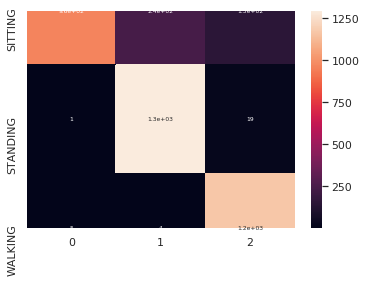

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  print(train_x.shape)
  train_y = train_y.astype(int)
  #print(train_x, type(train_x), train_x.shape)
  #print(train_y, type(train_y), train_y.shape)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
  clf.fit(train_x, train_y)
  #print(train_x[0],train_x[0].shape,train_x.shape)
  
  
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  #print(test_x, type(test_x), test_x.shape)
  #print(test_y, type(test_y), test_y.shape)
  
  true, pred = [], []
  
  for row_test in test_x:
    #ts_x = mmscaler.transform(test_x)
    #print("row test ",row_test, row_test.reshape(1,-1).shape)
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  
  #print("predicted probability ", pred_proba, type(pred_proba), len(pred_proba))
  #print("predicted activity ", )
  
  #print('length ' , len(list(test_y)),' ===== ', len(pred))
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  
  
  Predictions_test = clf.predict(test_x)
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  print("Testing Accuracy : {}".format(TestAccuracy))
  
  print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(true, pred)

ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
ov_accuracy = accuracy_score(true_all, pred_all)

print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)

class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))



array = confusion_matrix(true_all, pred_all)
df_cm = pd.DataFrame(array, range(n_class),range(n_class))
sn.set(font_scale=1)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'))# font size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 6},yticklabels=('SITTING', 'STANDING', 'WALKING'))

plt.show()

## Decission Tree

fold # :  precision, recall, f1score, accuracy
Testing Accuracy : 0.9867256637168141
Subject  2
fold 1 : 0.9867280316307842 0.9867256637168141 0.9867234767460343 0.9867256637168141
Testing Accuracy : 0.9854469854469855
Subject  4
fold 2 : 0.9861851818373558 0.9854469854469855 0.9854997805006277 0.9854469854469855
Testing Accuracy : 0.9938574938574939
Subject  5
fold 3 : 0.9938892205264984 0.9938574938574939 0.9938573012004072 0.9938574938574939
Testing Accuracy : 0.7648953301127214
Subject  6
fold 4 : 0.8600878248335222 0.7648953301127214 0.7355848826284209 0.7648953301127214
Testing Accuracy : 0.9961977186311787
Subject  7
fold 5 : 0.9962452471482889 0.9961977186311787 0.9961974100670586 0.9961977186311787
Testing Accuracy : 0.9859719438877755
Subject  8
fold 6 : 0.9860277042929276 0.9859719438877755 0.9859736326105584 0.9859719438877755
overall: 0.9565793191047356 0.9527885862516212 0.9528678564376095 0.9527885862516212
class-wise precision: [0.98773508 0.99008391 0.88342165]
class-w

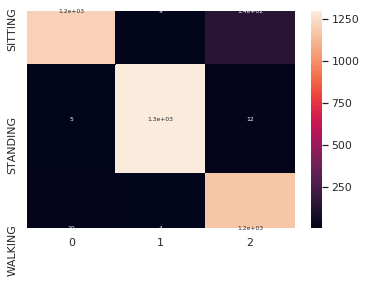

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  train_y = train_y.astype(int)
  #print(train_x, type(train_x), train_x.shape)
  #print(train_y, type(train_y), train_y.shape)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  #clf = DT(max_leaf_nodes=20, random_state=42)
  clf = DT(max_depth =10, max_leaf_nodes=20, random_state=42)
  clf.fit(train_x, train_y)
  #print(train_x[0],train_x[0].shape,train_x.shape)
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  true, pred = [], []
  
  for row_test in test_x:
    #ts_x = mmscaler.transform(test_x)
    #print("row test ",row_test, row_test.reshape(1,-1).shape)
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  
  
  Predictions_test = clf.predict(test_x)
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  print("Testing Accuracy : {}".format(TestAccuracy))
  print("Subject ", sub)
  print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(true, pred)

ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
ov_accuracy = accuracy_score(true_all, pred_all)

print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)

class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))

array = confusion_matrix(true_all, pred_all)
df_cm = pd.DataFrame(array, range(n_class),range(n_class))
sn.set(font_scale=1)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'))# font size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 6},yticklabels=('SITTING', 'STANDING', 'WALKING'))

plt.show()

## Random Forest

fold # :  precision, recall, f1score, accuracy
Testing Accuracy : 0.9882005899705014
Subject  2
fold 1 : 0.9886479609668806 0.9882005899705014 0.9882644394114917 0.9882005899705014
Testing Accuracy : 0.9896049896049897
Subject  4
fold 2 : 0.9898643029077812 0.9896049896049897 0.9896014542350006 0.9896049896049897
Testing Accuracy : 0.9963144963144963
Subject  5
fold 3 : 0.9963588999733578 0.9963144963144963 0.9963171985725235 0.9963144963144963
Testing Accuracy : 0.7665056360708534
Subject  6
fold 4 : 0.8655017845203454 0.7665056360708534 0.7369785387509975 0.7665056360708534
Testing Accuracy : 0.9923954372623575
Subject  7
fold 5 : 0.9924309726022529 0.9923954372623575 0.9923920973817063 0.9923954372623575
Testing Accuracy : 0.9859719438877755
Subject  8
fold 6 : 0.9860049472836796 0.9859719438877755 0.9859711537534857 0.9859719438877755
overall: 0.9585925212864562 0.9540856031128405 0.954248992807671 0.9540856031128405
class-wise precision: [0.99423394 0.99312452 0.87912913]
class-wi

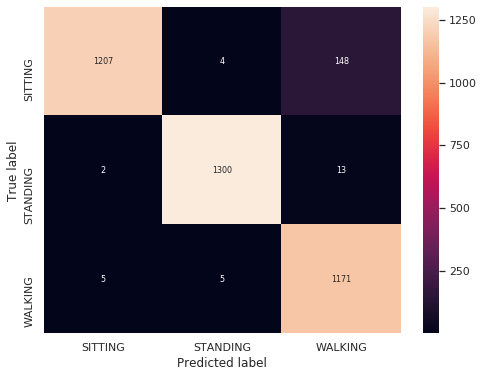

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  train_y = train_y.astype(int)
  #print(train_x, type(train_x), train_x.shape)
  #print(train_y, type(train_y), train_y.shape)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  clf = RF(n_estimators=100, max_depth=10, random_state=42)
  clf.fit(train_x, train_y)
  #print(train_x[0],train_x[0].shape,train_x.shape)
  
  
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  #print(test_x, type(test_x), test_x.shape)
  #print(test_y, type(test_y), test_y.shape)
  
  true, pred = [], []
  
  for row_test in test_x:
    #ts_x = mmscaler.transform(test_x)
    #print("row test ",row_test, row_test.reshape(1,-1).shape)
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  
  #print("predicted probability ", pred_proba, type(pred_proba), len(pred_proba))
  #print("predicted activity ", )
  
  #print('length ' , len(list(test_y)),' ===== ', len(pred))
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  
  
  Predictions_test = clf.predict(test_x)
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  print("Testing Accuracy : {}".format(TestAccuracy))
  
  print("Subject ", sub)
  print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(true, pred)

ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
ov_accuracy = accuracy_score(true_all, pred_all)

print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)

class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))



array = confusion_matrix(true_all, pred_all)
df_cm = pd.DataFrame(array, range(n_class),range(n_class))
plt.figure(figsize = (8,6))
sn.set(font_scale=1)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'))# font size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING'))


ax = sn.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING'),xticklabels=('SITTING', 'STANDING', 'WALKING'))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

## Logistic Regression

fold # :  precision, recall, f1score, accuracy


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing Accuracy : 0.9896755162241888
Subject  2
fold 1 : 0.989736413495657 0.9896755162241888 0.9896824396222829 0.9896755162241888


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing Accuracy : 0.9833679833679834
Subject  4
fold 2 : 0.984119092814745 0.9833679833679834 0.9833817342909291 0.9833679833679834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing Accuracy : 0.683046683046683
Subject  5
fold 3 : 0.8444714753586605 0.683046683046683 0.6346691267920792 0.683046683046683


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing Accuracy : 0.7681159420289855
Subject  6
fold 4 : 0.8424339580789663 0.7681159420289855 0.7337022564600877 0.7681159420289855


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing Accuracy : 0.9923954372623575
Subject  7
fold 5 : 0.9924309726022529 0.9923954372623575 0.9923920973817063 0.9923954372623575


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing Accuracy : 0.9839679358717435
Subject  8
fold 6 : 0.9840991686235359 0.9839679358717435 0.9839668164738616 0.9839679358717435
overall: 0.9104217580038132 0.8871595330739299 0.8850558932116404 0.8871595330739299
class-wise precision: [0.98858921 0.76212741 0.98559322]
class-wise recall: [0.70125092 0.99163498 0.98475868]
class-wise f1score: [0.82049074 0.86186385 0.98517577]
class-wise accuracy: [0.70125092 0.99163498 0.98475868]
[[ 953  399    7]
 [   1 1304   10]
 [  10    8 1163]]


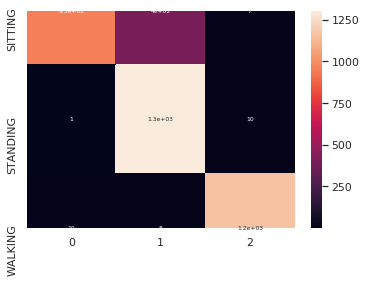

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  train_y = train_y.astype(int)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  clf = linear_model.LogisticRegression(penalty='l1')
  clf.fit(train_x, train_y)
  
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  
  true, pred = [], []
  
  for row_test in test_x:
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  
  
  Predictions_test = clf.predict(test_x)
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  print("Testing Accuracy : {}".format(TestAccuracy))
  print("Subject ", sub)
  print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(true, pred)

ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
ov_accuracy = accuracy_score(true_all, pred_all)

print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)

class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))



array = confusion_matrix(true_all, pred_all)
df_cm = pd.DataFrame(array, range(n_class),range(n_class))
#sn.set(font_scale=1)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'))# font size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 6},yticklabels=('SITTING', 'STANDING', 'WALKING'))

plt.show()

## MLP Classifier

fold # :  precision, recall, f1score, accuracy
Testing Accuracy : 0.9896755162241888
Subject  2
fold 1 : 0.9897685737155268 0.9896755162241888 0.989681138094746 0.9896755162241888
Testing Accuracy : 0.9896049896049897
Subject  4
fold 2 : 0.9899871591048062 0.9896049896049897 0.9896330210936951 0.9896049896049897
Testing Accuracy : 0.6805896805896806
Subject  5
fold 3 : 0.8372749813084912 0.6805896805896806 0.6325517797820054 0.6805896805896806
Testing Accuracy : 0.7632850241545893
Subject  6
fold 4 : 0.8439926906066593 0.7632850241545893 0.7286107120444361 0.7632850241545893
Testing Accuracy : 0.9847908745247148
Subject  7
fold 5 : 0.9850560771654713 0.9847908745247148 0.9847847493514972 0.9847908745247148
Testing Accuracy : 0.9839679358717435
Subject  8
fold 6 : 0.9839690437930261 0.9839679358717435 0.9839590013622636 0.9839679358717435
overall: 0.9080190504614759 0.8861219195849546 0.8838889375727494 0.8861219195849546
class-wise precision: [0.98553719 0.76415094 0.97900924]
class-wi

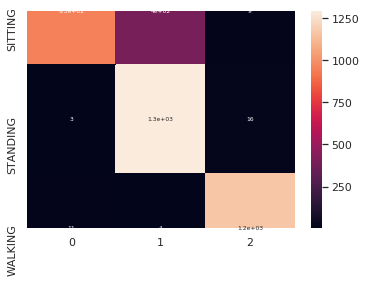

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  train_y = train_y.astype(int)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1,solver='adam')
  clf.fit(train_x, train_y)
  
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  
  true, pred = [], []
  
  for row_test in test_x:
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  
  
  Predictions_test = clf.predict(test_x)
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  print("Testing Accuracy : {}".format(TestAccuracy))
  print("Subject ", sub)
  print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(true, pred)

ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
ov_accuracy = accuracy_score(true_all, pred_all)

print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)

class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))



array = confusion_matrix(true_all, pred_all)
df_cm = pd.DataFrame(array, range(n_class),range(n_class))
sn.set(font_scale=1)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'))# font size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 6},yticklabels=('SITTING', 'STANDING', 'WALKING'))

plt.show()

fold # :  precision, recall, f1score, accuracy


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy : 0.9852507374631269
Subject  2
fold 1 : 0.9853386425884214 0.9852507374631269 0.9852643967449594 0.9852507374631269


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy : 0.9854469854469855
Subject  4
fold 2 : 0.9861851818373558 0.9854469854469855 0.9854997805006277 0.9854469854469855


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy : 0.6805896805896806
Subject  5
fold 3 : 0.8372749813084912 0.6805896805896806 0.6325517797820054 0.6805896805896806


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy : 0.7632850241545893
Subject  6
fold 4 : 0.8439926906066593 0.7632850241545893 0.7286107120444361 0.7632850241545893


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy : 0.9847908745247148
Subject  7
fold 5 : 0.9850560771654713 0.9847908745247148 0.9847847493514972 0.9847908745247148


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy : 0.9839679358717435
Subject  8
fold 6 : 0.9839690437930261 0.9839679358717435 0.9839590013622636 0.9839679358717435
overall: 0.9066166052766951 0.8848249027237354 0.8824897343612726 0.8848249027237354
class-wise precision: [0.98345398 0.76370065 0.97732997]
class-wise recall: [0.69977925 0.98555133 0.98560542]
class-wise f1score: [0.81771281 0.86055777 0.98145025]
class-wise accuracy: [0.69977925 0.98555133 0.98560542]
[[ 951  397   11]
 [   3 1296   16]
 [  13    4 1164]]


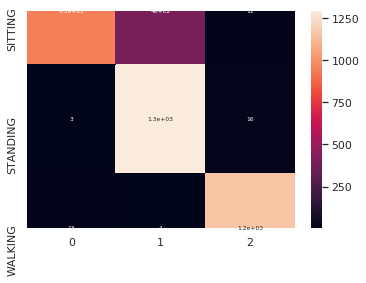

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  train_y = train_y.astype(int)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1, solver ='sgd',max_iter=500 )
  clf.fit(train_x, train_y)
  
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  
  true, pred = [], []
  
  for row_test in test_x:
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  
  
  Predictions_test = clf.predict(test_x)
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  print("Testing Accuracy : {}".format(TestAccuracy))
  print("Subject ", sub)
  print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(true, pred)

ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
ov_accuracy = accuracy_score(true_all, pred_all)

print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)

class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))



array = confusion_matrix(true_all, pred_all)
df_cm = pd.DataFrame(array, range(n_class),range(n_class))
#sn.set(font_scale=1)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'))# font size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 6},yticklabels=('SITTING', 'STANDING', 'WALKING'))

plt.show()

## SVM

In [0]:
cm_all = np.zeros((n_class,n_class))
true_all, pred_all = [], []
fold_result = []

print("fold # :  precision, recall, f1score, accuracy")

acc = 0
c=0

for f, sub in enumerate(subjects[:]):
  
  train_data = (df.loc[df['subject'] != sub]).values
  test_data = (df.loc[df['subject'] == sub]).values
  
  le = preprocessing.LabelEncoder()
  train_y = le.fit_transform(train_data[:,-1].astype('str'))+1
  
  train_x = train_data[: , :-2 ].astype(float)
  train_y = train_y.astype(int)
  
  mmscaler = MinMaxScaler()
  #mmscaler.fit(train_x)
  #train_x = mmscaler.transform(train_x)
  #print(train_x)
  
  #clf = svm.SVC(gamma='auto')
  clf = svm.SVC(kernel = 'rbf', gamma='scale')
  #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ gamma= scale
  clf.fit(train_x, train_y)
  
  
  le = preprocessing.LabelEncoder()
  test_y = le.fit_transform(test_data[:,-1].astype('str'))+1
  
  test_x = test_data[: , :-2 ].astype(float)
  test_y = test_y.astype(int)
  
  true, pred = [], []
  
  '''
  for row_test in test_x:
    pred_proba = clf.predict_proba(row_test.reshape(1,-1))
    #pred_proba = np.mean(pred_proba, axis=0)
    pred += [activity_ids[np.argmax(pred_proba)]]
  
  true = list(test_y)
  
  true_all += true
  pred_all += pred
  
  precision, recall, f1score, _ = precision_recall_fscore_support(true, pred, average='weighted')  
  accuracy = accuracy_score(true, pred)
  fold_result += [precision, recall, f1score, accuracy]
  '''
  
  Predictions_test = clf.predict(test_x)
  #print(Predictions_test, type(Predictions_test))
  TestAccuracy = accuracy_score(y_true = test_y, y_pred = Predictions_test)
  
  print("Subject ", sub)
  print("fold", f+1,":","Testing Accuracy : {}".format(TestAccuracy))
  
  acc = acc+TestAccuracy
  c =c+1
  
  ar = confusion_matrix(test_y, Predictions_test)
  #print(ar, type (ar), ar.shape)
  
  #print("fold", f+1,":", precision,recall,f1score,accuracy)
  cm_all += confusion_matrix(test_y, Predictions_test)
  print(cm_all)

#ov_precision, ov_recall, ov_f1score, _ = precision_recall_fscore_support(true_all, pred_all, average='weighted')
#ov_accuracy = accuracy_score(true_all, pred_all)

#print("overall:", ov_precision, ov_recall, ov_f1score,ov_accuracy)
print("overall accuracy  ", acc/c)
class_prec, class_rec, class_f1 = classification_report(cm_all)
class_acc = cm_all.diagonal()/np.sum(cm_all, axis=1)
print('class-wise precision:',class_prec)
print('class-wise recall:',class_rec)
print('class-wise f1score:',class_f1)
print('class-wise accuracy:',class_acc)

print(cm_all.astype('int'))





fold # :  precision, recall, f1score, accuracy
Subject  2
fold 1 : Testing Accuracy : 0.9823008849557522
[[239.   1.   5.]
 [  1. 226.   3.]
 [  2.   0. 201.]]
Subject  4
fold 2 : Testing Accuracy : 0.9854469854469855
[[370.   1.   5.]
 [  1. 386.   3.]
 [  9.   0. 384.]]
Subject  5
fold 3 : Testing Accuracy : 0.6818181818181818
[[440. 256.   8.]
 [  1. 625.   4.]
 [  9.   0. 630.]]
Subject  6
fold 4 : Testing Accuracy : 0.7648953301127214
[[496. 256. 147.]
 [  1. 847.  11.]
 [  9.   0. 827.]]
Subject  7
fold 5 : Testing Accuracy : 0.9847908745247148
[[572. 257. 148.]
 [  1. 924.  13.]
 [  9.   0. 933.]]
Subject  8
fold 6 : Testing Accuracy : 0.9869739478957916
[[ 948.  258.  153.]
 [   2. 1298.   15.]
 [  11.    2. 1168.]]
overall accuracy   0.8977043674590246
class-wise precision: [0.98647242 0.83311938 0.8742515 ]
class-wise recall: [0.69757174 0.98707224 0.98899238]
class-wise f1score: [0.81724138 0.9035851  0.92808899]
class-wise accuracy: [0.69757174 0.98707224 0.98899238]
[[ 948

##Confusion Matrix Graph Plot

In [0]:
def print_confusion_matrix(confusion_matrix, class_names,  figsize = (8,6), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    ax = sn.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 8},yticklabels=('SITTING', 'STANDING', 'WALKING'),xticklabels=('SITTING', 'STANDING', 'WALKING'))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.xlabel('Predicted label')
    #return fig

In [0]:
confusion_matrix = np.asarray(
    [
     [320, 117,18],
     [2 ,435 ,2],
     [5 ,4 ,380]
    ]
)

In [0]:
confusion_matrix

array([[320, 117,  18],
       [  2, 435,   2],
       [  5,   4, 380]])

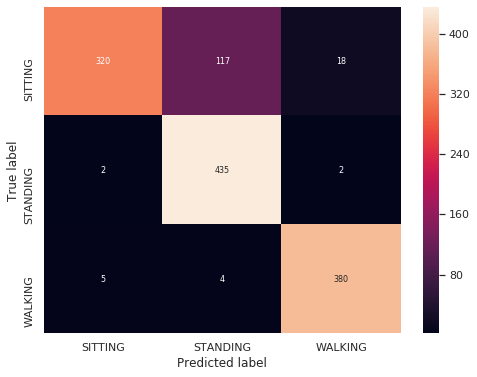

In [0]:
print_confusion_matrix(confusion_matrix, ['SITTING', 'STANDING', 'WALKING'])